In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb

from pandas.tools.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import \
        confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, \
        classification_report, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from datetime import datetime

In [72]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);


In [73]:
df = pd.read_csv('GuangzhouPM20100101_20151231.csv')
df.head()

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0
1,2,2010,1,1,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0
2,3,2010,1,1,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3
3,4,2010,1,1,3,4.0,NaN,NaN,NaN,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9
4,5,2010,1,1,4,4.0,NaN,NaN,NaN,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6


In [74]:
df = df.drop(columns=['No'])

In [75]:
df.columns = ['year', 'month', 'day', 'hour', 'season', 'PM_city', 'PM_5th', 
                'PM_us', 'dewp', 'humi', 'pres', 'temp', 'cbwd', 'lws', 'precipitation', 'lprec']

In [76]:
df['PM'] = df.loc[:,['PM_city', 'PM_5th', 'PM_us']].mean(axis=1)

In [77]:
df.sample(10)

,year,month,day,hour,season,PM_city,PM_5th,PM_us,dewp,humi,pres,temp,cbwd,lws,precipitation,lprec,PM
12904,2011,6,22,16,2.0,NaN,NaN,NaN,24.900000,80.0,989.500000,28.700000,NE,64.5,0.0,0.0,NaN
31188,2013,7,23,12,2.0,27.0,NaN,27.0,24.900000,66.0,1001.200000,32.100000,NE,11.2,0.0,0.0,27.000000
27488,2013,2,19,8,4.0,53.0,61.0,53.0,17.200000,98.0,1006.900000,17.500000,NW,0.7,0.0,0.0,55.666667
29780,2013,5,25,20,1.0,23.0,NaN,23.0,24.200000,89.0,1000.200000,26.200000,SE,31.0,0.0,0.0,23.000000
12293,2011,5,28,5,1.0,NaN,NaN,NaN,16.200000,70.0,998.700000,21.900000,NW,1.6,0.0,0.0,NaN
7315,2010,11,1,19,3.0,NaN,NaN,NaN,9.200000,55.0,1012.500000,18.400000,NE,0.7,0.0,0.0,NaN
39220,2014,6,23,4,2.0,52.0,22.0,52.0,23.700000,95.0,995.400000,24.600000,NW,1.1,0.0,0.0,42.000000
50885,2015,10,22,5,3.0,38.0,37.0,38.0,18.200001,88.0,1003.599976,20.299999,NW,8.4,0.0,0.0,37.666667
16378,2011,11,14,10,3.0,NaN,NaN,NaN,15.700000,62.0,1011.800000,23.400000,NW,2.4,0.0,0.0,NaN
31938,2013,8,23,18,2.0,43.0,NaN,43.0,25.200000,82.0,989.700000,28.600000,SE,2.7,0.0,0.0,43.000000


In [78]:
data = df.dropna(subset=['PM'])
data = data.drop(columns=['PM_city','PM_5th','PM_us'])

In [79]:
print(data.isnull().mean())

year             0.00000
month            0.00000
day              0.00000
hour             0.00000
season           0.00003
dewp             0.00003
humi             0.00003
pres             0.00003
temp             0.00003
cbwd             0.00003
lws              0.00003
precipitation    0.00003
lprec            0.00003
PM               0.00000
dtype: float64


In [80]:
data = data.dropna()
print(data.isnull().mean())

year             0.0
month            0.0
day              0.0
hour             0.0
season           0.0
dewp             0.0
humi             0.0
pres             0.0
temp             0.0
cbwd             0.0
lws              0.0
precipitation    0.0
lprec            0.0
PM               0.0
dtype: float64


In [81]:
len(data)

33372

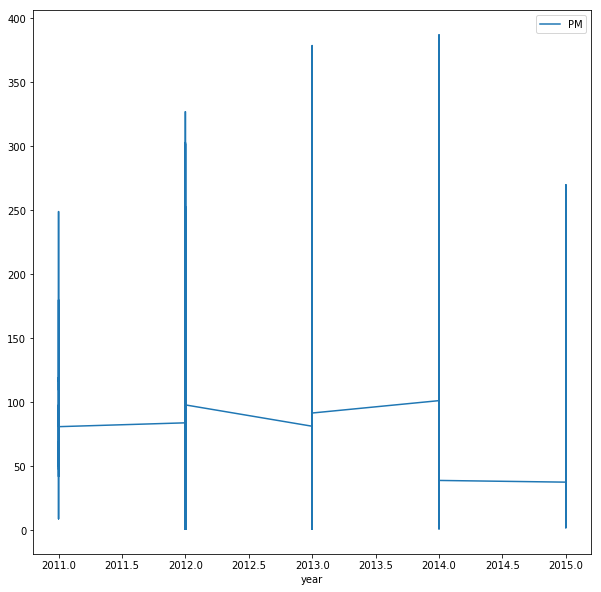

In [82]:
df.plot('year','PM',figsize=[10,10])

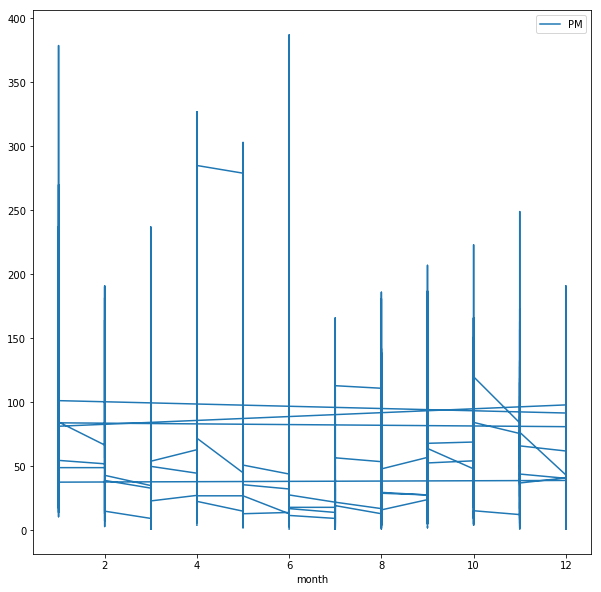

In [83]:
df.plot('month','PM',figsize=[10,10])

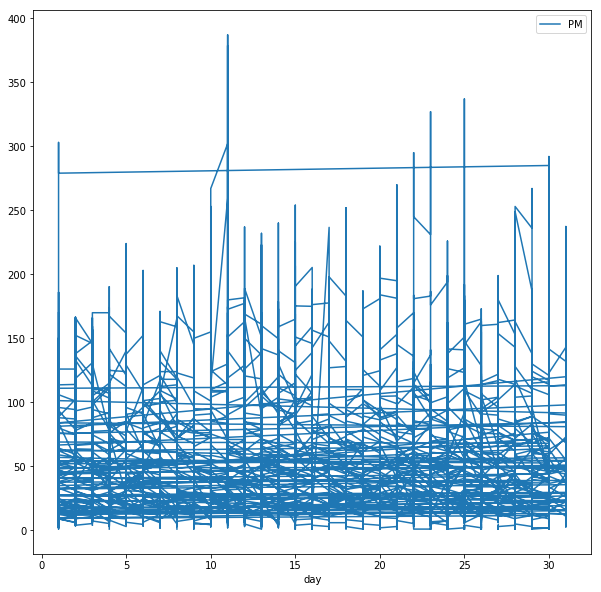

In [84]:
df.plot('day','PM', figsize=[10,10])

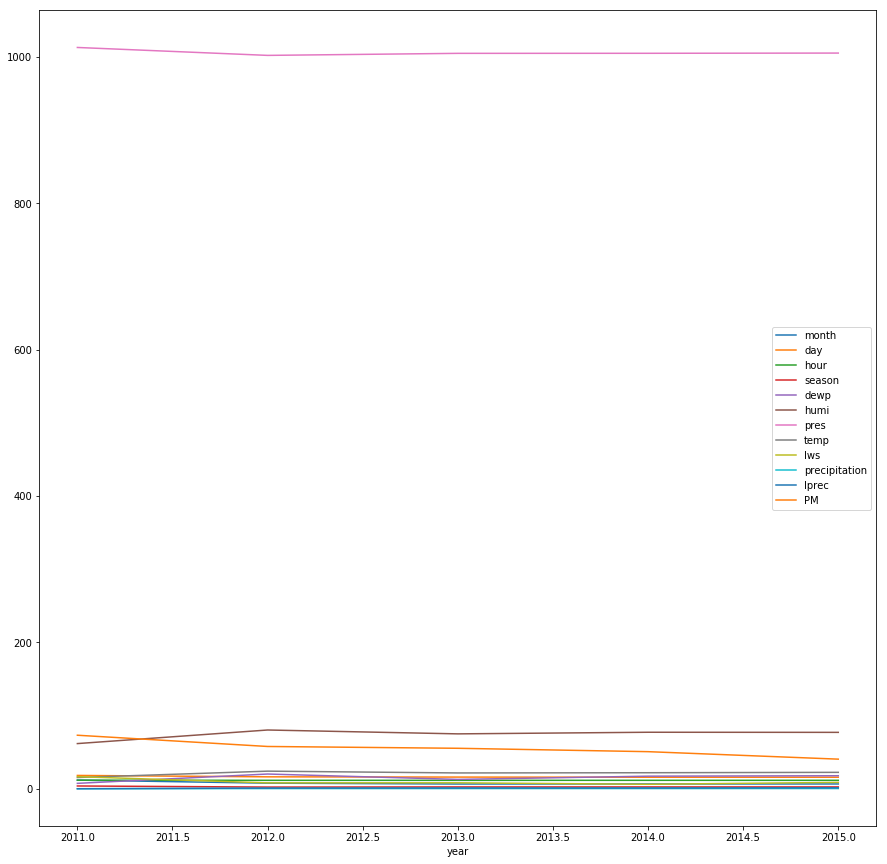

In [85]:
data.groupby('year').mean().plot(figsize=[15,15])

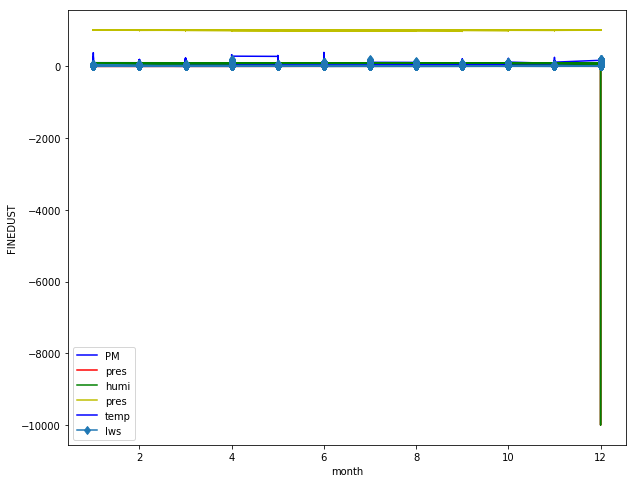

In [86]:
plt.figure(figsize=(10, 8))
plt.plot(data['month'], data['PM'], 'b-', label = 'PM')
plt.plot(data['month'], data['dewp'], 'r-', label = 'pres')
plt.plot(data['month'], data['humi'], 'g-', label = 'humi')
plt.plot(data['month'], data['pres'], 'y-', label = 'pres')
plt.plot(data['month'], data['temp'], 'b-', label = 'temp')
plt.plot(data['month'], data['lws'], 'd-', label = 'lws')
plt.xlabel('month');
plt.ylabel('FINEDUST')
plt.legend();

In [87]:
data.year = data.year.astype(object)

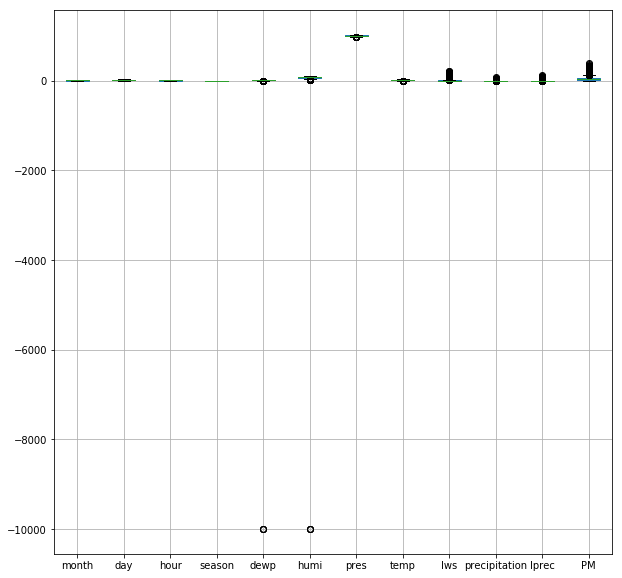

In [88]:
data.boxplot(figsize=(10,10))

#### dewp와 humi 에서 튀는 값이 보인다 ㅂㄷㅂㄷ

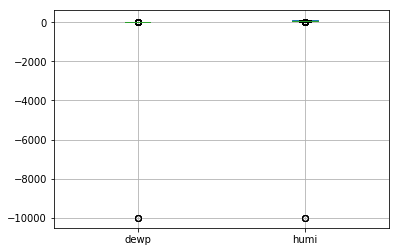

In [89]:
data.boxplot(column=["dewp","humi"])

In [90]:
data[(data['dewp'] < -9000)]

,year,month,day,hour,season,dewp,humi,pres,temp,cbwd,lws,precipitation,lprec,PM
34636,2013,12,14,4,4.0,-9999.0,-9999.0,1011.0,12.6,NW,11.5,0.7,4.5,69.0
34637,2013,12,14,5,4.0,-9999.0,-9999.0,1010.8,12.7,NW,13.5,0.2,4.7,66.0
34638,2013,12,14,6,4.0,-9999.0,-9999.0,1011.1,12.8,NW,15.7,0.5,5.2,60.0
34639,2013,12,14,7,4.0,-9999.0,-9999.0,1011.6,13.3,NW,18.6,0.5,5.7,44.0


In [91]:
data[(data['humi'] < -9000)]

,year,month,day,hour,season,dewp,humi,pres,temp,cbwd,lws,precipitation,lprec,PM
34636,2013,12,14,4,4.0,-9999.0,-9999.0,1011.0,12.6,NW,11.5,0.7,4.5,69.0
34637,2013,12,14,5,4.0,-9999.0,-9999.0,1010.8,12.7,NW,13.5,0.2,4.7,66.0
34638,2013,12,14,6,4.0,-9999.0,-9999.0,1011.1,12.8,NW,15.7,0.5,5.2,60.0
34639,2013,12,14,7,4.0,-9999.0,-9999.0,1011.6,13.3,NW,18.6,0.5,5.7,44.0


In [92]:
data = data[(data['dewp'] > -9000)]
data = data[(data['humi'] > -9000)]

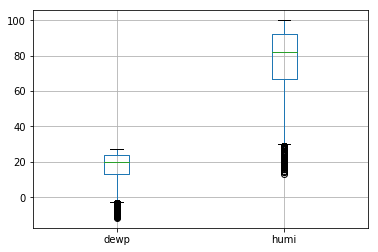

In [93]:
data.boxplot(column=["dewp","humi"])

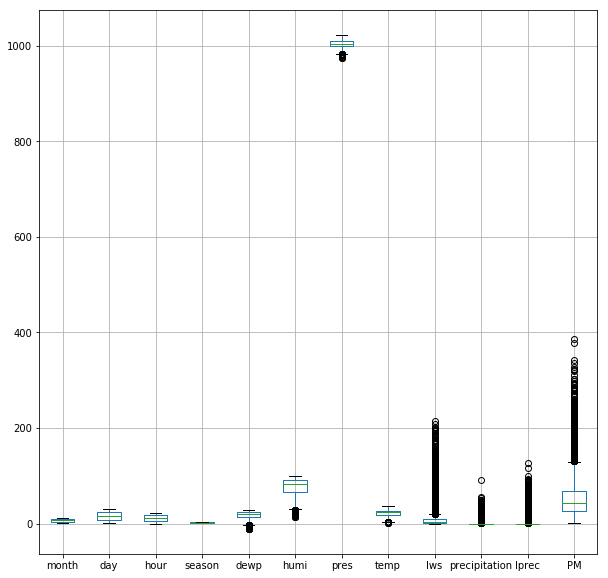

In [95]:
data.boxplot(figsize=(10,10), return_type='axes')

- 스케일링을 할 필요가 있음

c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


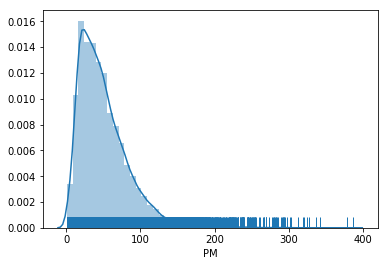

In [96]:
sns.distplot(data['PM'], rug=True)
plt.show()

In [53]:
# data['PM'] = np.log(1+data['PM'])
# data['lws'] = np.log(1+data['lws'])
# data['precipitation'] = np.log(1+data['precipitation'])
# data['lprec'] = np.log(1+data['lprec'])
# data['pres'] = np.log(1+data['pres'])

In [55]:
# data.boxplot(figsize=(10,10), return_type='axes')

In [56]:
# sns.distplot(data['PM'], rug=True)
# plt.show()

In [28]:
# https://wikidocs.net/16582

# 데이터 분포 변환
# 대부분의 모델은 변수가 특정 분포를 따른다는 가정을 기반으로 한다. 예를 들어 선형 모델의 경우, 설명 및 종속변수 모두가 정규분포와 유사할 경우 성능이 높아지는 것으로 알려져 있다. 자주 쓰이는 방법은 Log, Exp, Sqrt 등 함수를 이용해 데이터 분포를 변환하는 것이다. 

# import math
# from sklearn import preprocessing

# # 특정 변수에만 함수 적용
# df['X_log'] = preprocessing.scale(np.log(df['X']+1)) # 로그
# df['X_sqrt'] = preprocessing.scale(np.sqrt(df['X']+1)) # 제곱근

# # 데이터 프레임 전체에 함수 적용 (단, 숫자형 변수만 있어야 함)
# df_log = df.apply(lambda x: np.log(x+1)) 

# 위 방법 외에도 분포의 특성에 따라 제곱, 자연로그, 지수 등 다양한 함수가 사용될 수 있다. 가이드는 아래와 같다.

# left_distribution: X^3
# mild_left: X^2
# mild_right: sqrt(X)
# right: ln(X)
# servere right: 1/X

In [57]:
# data.loc[df.month <= 3, 'month_c'] = '1st'
# data.loc[(df.month >3) & (df.month <=6), 'month_c'] = '2nd'
# data.loc[(df.month >6) & (df.month <=9), 'month_c'] = '3rd'
# data.loc[(df.month >9) & (df.month <=12), 'month_c'] = '4th'

In [97]:
data.loc[df.day <= 10, 'day'] = 'early'
data.loc[(df.month >10) & (df.month <=20), 'day'] = 'middle'
data.loc[(df.month >20) & (df.month <=31), 'day'] = 'late'

In [98]:
data.loc[df.hour <= 6, 'hour'] = 'dawn'
data.loc[(df.hour >6) & (df.hour <=12), 'hour'] = 'morning'
data.loc[(df.hour >12) & (df.hour <=18), 'hour'] = 'afternoon'
data.loc[(df.hour >18) & (df.hour <=24), 'hour'] = 'evening'

In [99]:
data.year = data.year.astype(object)
data.month = data.month.astype(object)
data.season = data.season.astype(object)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33368 entries, 16549 to 52582
Data columns (total 14 columns):
year             33368 non-null object
month            33368 non-null object
day              33368 non-null object
hour             33368 non-null object
season           33368 non-null object
dewp             33368 non-null float64
humi             33368 non-null float64
pres             33368 non-null float64
temp             33368 non-null float64
cbwd             33368 non-null object
lws              33368 non-null float64
precipitation    33368 non-null float64
lprec            33368 non-null float64
PM               33368 non-null float64
dtypes: float64(8), object(6)
memory usage: 3.8+ MB


In [101]:
data_numeric = data.drop(columns=['year', 'month', 'day', 'hour', 'season', 'cbwd'])
data_category = data[['year', 'month', 'day', 'hour', 'season', 'cbwd']]
data_dummies = pd.get_dummies(data_category, columns=['year', 'month', 'day', 'hour', 'season', 'cbwd'])
data_dummies.head()

,year_2011,year_2012,year_2013,year_2014,year_2015,month_1,month_2,month_3,month_4,month_5,...,hour_morning,season_1.0,season_2.0,season_3.0,season_4.0,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
16549,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
16550,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16551,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16552,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16553,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


                   dewp      humi      pres      temp       lws  \
dewp           1.000000  0.462092 -0.843586  0.833054 -0.146862   
humi           0.462092  1.000000 -0.239530 -0.098162 -0.128759   
pres          -0.843586 -0.239530  1.000000 -0.805681  0.039998   
temp           0.833054 -0.098162 -0.805681  1.000000 -0.094065   
lws           -0.146862 -0.128759  0.039998 -0.094065  1.000000   
precipitation  0.071460  0.121222 -0.089513  0.012207 -0.008855   
lprec          0.068286  0.167663 -0.084990 -0.016238  0.013354   
PM            -0.217011 -0.037478  0.228386 -0.219056 -0.096602   

               precipitation     lprec        PM  
dewp                0.071460  0.068286 -0.217011  
humi                0.121222  0.167663 -0.037478  
pres               -0.089513 -0.084990  0.228386  
temp                0.012207 -0.016238 -0.219056  
lws                -0.008855  0.013354 -0.096602  
precipitation       1.000000  0.525256 -0.074531  
lprec               0.525256  1.000000 

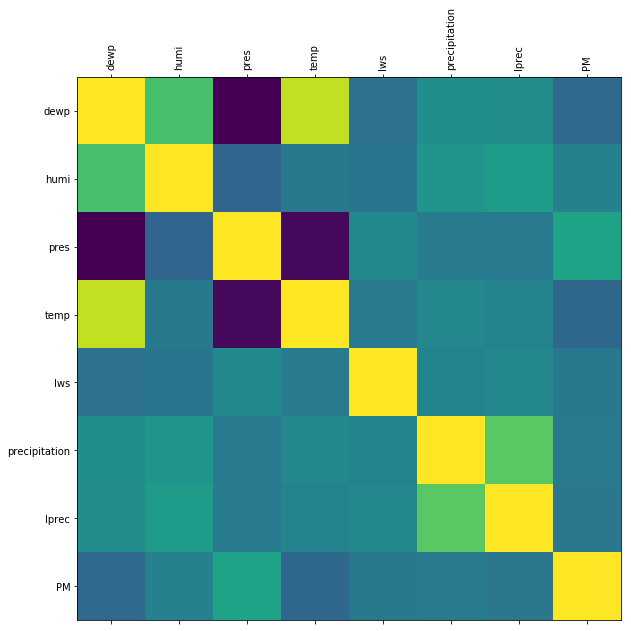

In [102]:
plot_corr(data_numeric)

                year_2011  year_2012  year_2013  year_2014  year_2015  \
year_2011        1.000000  -0.081687  -0.097018  -0.099035  -0.099135   
year_2012       -0.081687   1.000000  -0.286886  -0.292853  -0.293148   
year_2013       -0.097018  -0.286886   1.000000  -0.347812  -0.348163   
year_2014       -0.099035  -0.292853  -0.347812   1.000000  -0.355403   
year_2015       -0.099135  -0.293148  -0.348163  -0.355403   1.000000   
month_1         -0.045370  -0.109726   0.042250   0.036938   0.036679   
month_2         -0.042135  -0.124596   0.045923   0.041210   0.040966   
month_3         -0.047820  -0.049665   0.024791   0.018619   0.019124   
month_4         -0.050860   0.041708  -0.002476  -0.009154  -0.007230   
month_5         -0.050303   0.007438   0.007056   0.002544   0.002275   
month_6         -0.051045   0.042474  -0.002917  -0.008150  -0.008418   
month_7         -0.051064   0.046670  -0.018243  -0.002449  -0.002720   
month_8         -0.051268   0.047838  -0.016555  -0

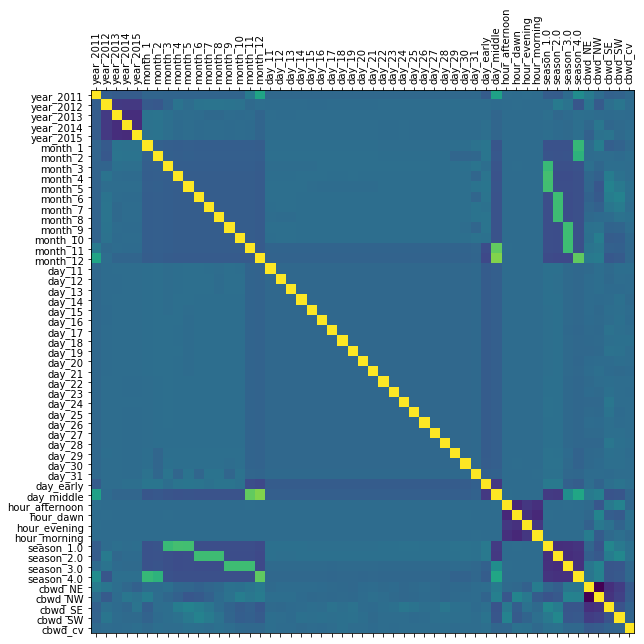

In [103]:
plot_corr(data_dummies)

#### 정규화 해보장

In [104]:
data_total = pd.concat((data_numeric,data_dummies), axis=1)
data_x = data_total.drop(columns=['PM'])
data_y = data.PM

In [105]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                  test_size=0.3,
                                                  shuffle=True,
                                                  random_state=123456)

In [106]:
# c = int(len(data_x) * 0.9)

# X_train = data_x.iloc[:c,:]
# y_train = data_y[:c]
# X_test = data_x.iloc[c:, :]
# y_test = data_y[c:]

In [107]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

# X_train_scaled = X_train

c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,dewp,humi,pres,temp,lws,precipitation,lprec,year_2011,year_2012,year_2013,...,hour_morning,season_1.0,season_2.0,season_3.0,season_4.0,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,0.818314,0.230814,-1.068494,0.721447,-0.341392,-0.128098,-0.172229,-0.164857,-0.493945,1.715840,...,1.729139,-0.573049,1.689465,-0.589596,-0.554848,1.300823,-0.715114,-0.437886,-0.350772,-0.141896
1,0.678764,0.769740,-0.852439,0.310045,-0.523469,-0.128098,-0.172229,-0.164857,-0.493945,-0.582805,...,-0.578323,-0.573049,1.689465,-0.589596,-0.554848,1.300823,-0.715114,-0.437886,-0.350772,-0.141896
2,0.371754,0.709859,0.127000,0.005302,-0.101381,-0.128098,-0.172229,-0.164857,-0.493945,-0.582805,...,1.729139,1.745051,-0.591904,-0.589596,-0.554848,1.300823,-0.715114,-0.437886,-0.350772,-0.141896
3,0.929953,0.170933,-0.737213,0.889055,-0.490364,0.506789,0.050684,-0.164857,-0.493945,-0.582805,...,1.729139,-0.573049,1.689465,-0.589596,-0.554848,-0.768744,1.398378,-0.437886,-0.350772,-0.141896
4,-0.856285,-0.547635,0.962405,-0.741316,0.709689,-0.128098,-0.172229,-0.164857,2.024517,-0.582805,...,-0.578323,-0.573049,-0.591904,1.696078,-0.554848,1.300823,-0.715114,-0.437886,-0.350772,-0.141896


In [108]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

# X_test_scaled = X_test

c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,dewp,humi,pres,temp,lws,precipitation,lprec,year_2011,year_2012,year_2013,...,hour_morning,season_1.0,season_2.0,season_3.0,season_4.0,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,-1.022441,0.260653,1.067057,-1.364464,0.022277,-0.143176,-0.174733,-0.169317,-0.485722,-0.585848,...,-0.573698,-0.566776,-0.591232,-0.590155,1.781777,-0.764211,1.397533,-0.441977,-0.352062,-0.139091
1,0.475491,0.907022,-0.479178,0.012959,-0.353785,-0.143176,-0.174733,-0.169317,-0.485722,1.706928,...,-0.573698,-0.566776,-0.591232,1.694470,-0.561237,1.308539,-0.715547,-0.441977,-0.352062,-0.139091
2,0.310581,0.495696,-0.207155,0.028096,-0.323086,-0.143176,-0.174733,-0.169317,-0.485722,1.706928,...,1.743078,-0.566776,-0.591232,1.694470,-0.561237,1.308539,-0.715547,-0.441977,-0.352062,-0.139091
3,0.448006,-0.033152,0.780717,0.467055,-0.584027,-0.143176,-0.174733,-0.169317,-0.485722,1.706928,...,1.743078,-0.566776,-0.591232,1.694470,-0.561237,-0.764211,-0.715547,-0.441977,-0.352062,7.189539
4,0.420521,0.848261,-0.908688,-0.017314,-0.545654,-0.143176,-0.174733,-0.169317,-0.485722,1.706928,...,-0.573698,-0.566776,1.691384,-0.590155,-0.561237,1.308539,-0.715547,-0.441977,-0.352062,-0.139091


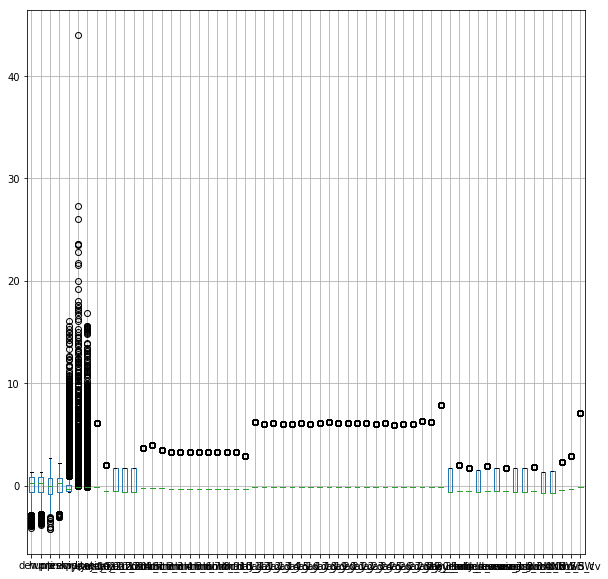

In [109]:
X_train_scaled.boxplot(figsize=[10,10])

In [110]:
model = KNeighborsRegressor(n_neighbors=5)

In [111]:
model.fit(X_train_scaled,np.array(y_train))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [112]:
model.score(X_train_scaled, np.array(y_train))

0.7829898845797102

In [113]:
y_pred = model.predict(X_test_scaled)

### L1 Error

In [114]:
np.mean(np.abs(y_pred - y_test))

13.532913794825692

### MSE

In [115]:
mean_squared_error(y_test, y_pred)

439.40695546010505

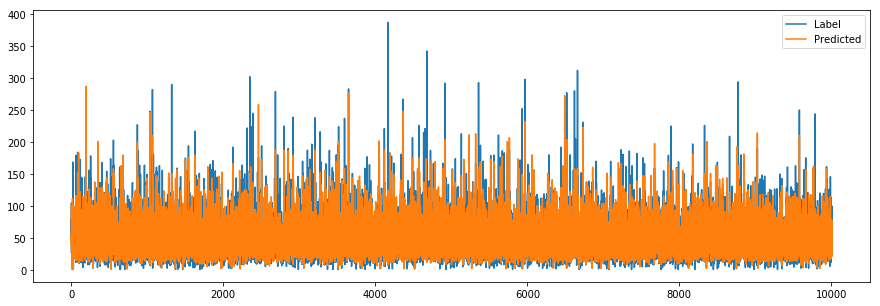

In [116]:
plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

### Linear Regression

Train score : 0.2626453655838885 
Test score : -5.047794605162577e+22 
Test L1 Error : 6286350464552.749 
Test MSE : 6.302040271047533e+25 
R2 : -5.047794605162577e+22


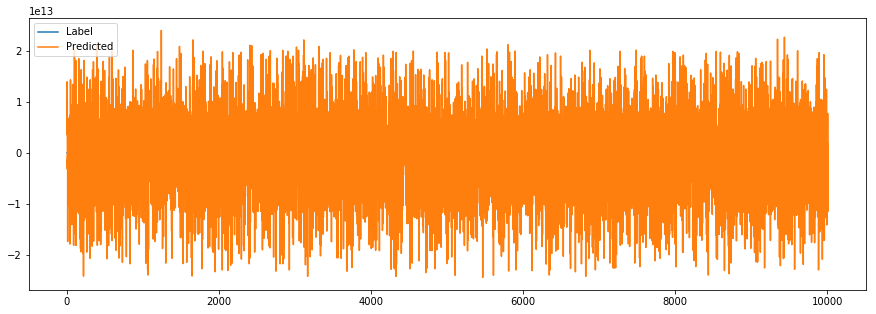

In [117]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nR2 : {}".format(
    model.score(X_train_scaled, y_train), 
    model.score(X_test_scaled, y_test), 
    np.mean(np.abs(y_pred - y_test)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

### Ridge

Train score : 0.26311865342594176 
Test score : 0.2495890825371014 
Test L1 Error : 21.677654723843965 
Test MSE : 936.8685122109083 
R2 : 0.24958908253710144


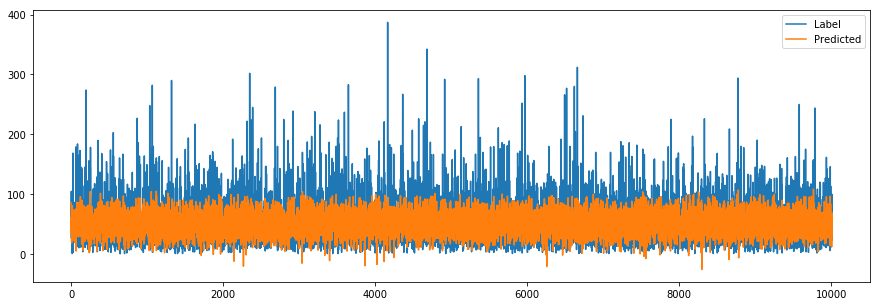

In [118]:
model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nR2 : {}".format(
    model.score(X_train_scaled, y_train), 
    model.score(X_test_scaled, y_test), 
    np.mean(np.abs(y_pred - y_test)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

### Lasso

Train score : 0.22931322306127733 
Test score : 0.22142708380619636 
Test L1 Error : 22.006690014915222 
Test MSE : 972.0280351308463 
R2 : 0.22142708380619636


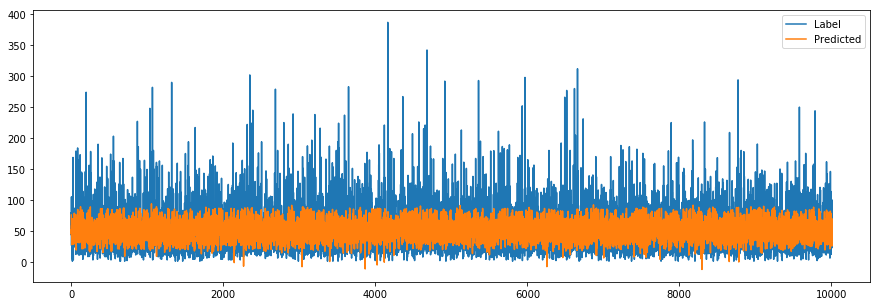

In [119]:
model = Lasso()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nR2 : {}".format(
    model.score(X_train_scaled, y_train), 
    model.score(X_test_scaled, y_test), 
    np.mean(np.abs(y_pred - y_test)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

### Logistic Regression

c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train score : 0.04880763796720469 
Test score : 0.025971431425432026 
Test L1 Error : 22.668664469084007 
Test MSE : 1212.2671394799054 
R2 : 0.029000884872894872


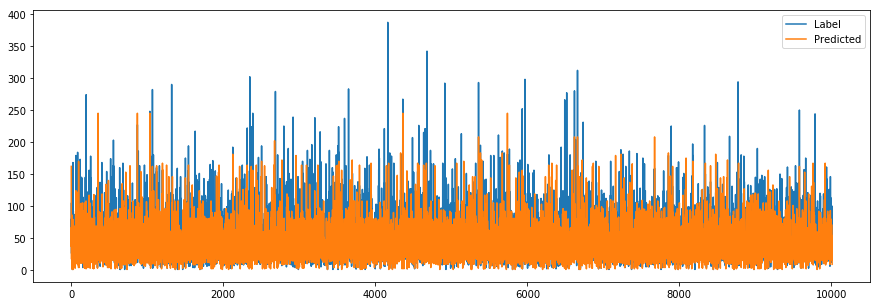

In [120]:
y = y_train.astype(int)
yt = y_test.astype(int)

model = LogisticRegression()
model.fit(X_train_scaled, y)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nR2 : {}".format(
    model.score(X_train_scaled, y), 
    model.score(X_test_scaled, yt), 
    np.mean(np.abs(y_pred - yt)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(yt))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

### Gradient Boost

Train score : 0.40835277460192404 
Test score : 0.3813053735780114 
Test L1 Error : 19.28817419073774 
Test MSE : 772.4241487964629 
R2 : 0.3813053735780114


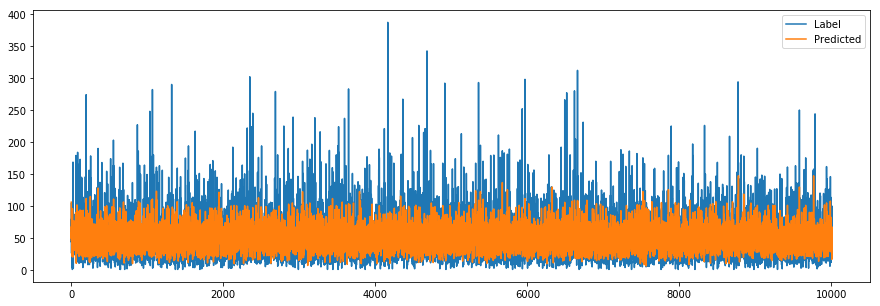

In [121]:
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nR2 : {}".format(
    model.score(X_train_scaled, y_train), 
    model.score(X_test_scaled, y_test), 
    np.mean(np.abs(y_pred - y_test)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

### X-Gradient Boost

Train score : 0.4076672595188532 
Test score : 0.38094709006082395 
Test L1 Error : 19.281889993152994 
Test MSE : 772.8714564486914 
Test R2 : 0.38094709006082395


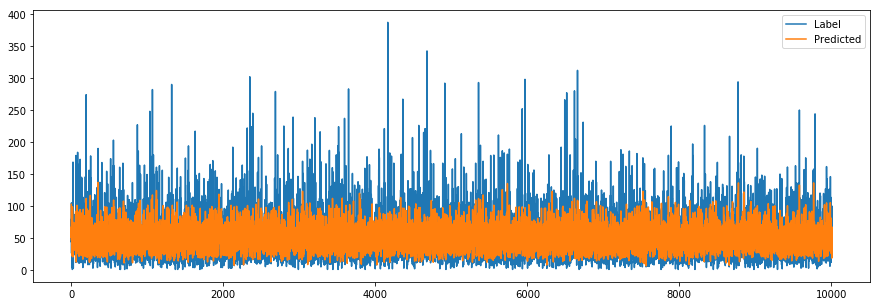

In [122]:
model = xgb.XGBRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nTest R2 : {}".format(
    model.score(X_train_scaled, y_train), 
    model.score(X_test_scaled, y_test), 
    np.mean(np.abs(y_pred - y_test)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

### Decision Tree

Train score : 1.0 
Test score : 0.48512707222926843 
Test L1 Error : 14.842573169513535 
Test MSE : 642.8054584401602 
Test R2 : 0.48512707222926843


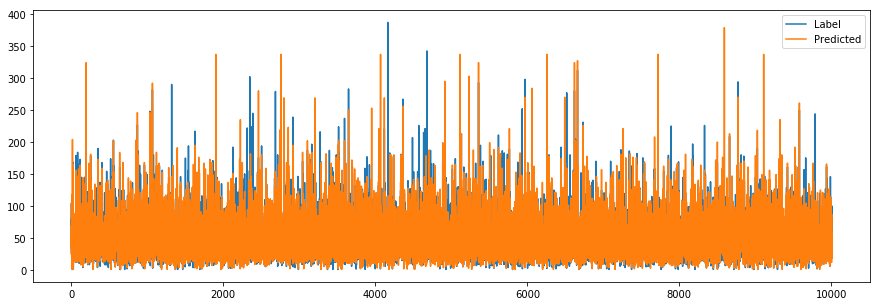

In [123]:
model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nTest R2 : {}".format(
    model.score(X_train_scaled, y_train), 
    model.score(X_test_scaled, y_test), 
    np.mean(np.abs(y_pred - y_test)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

### Random Forest

c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score : 0.9490847862698669 
Test score : 0.7370865053123629 
Test L1 Error : 11.832064728798322 
Test MSE : 328.2406597187538 
Test R2 : 0.7370865053123629


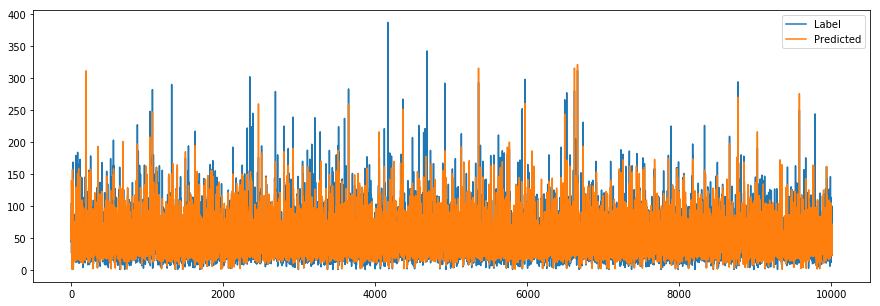

In [124]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nTest R2 : {}".format(
    model.score(X_train_scaled, y_train), 
    model.score(X_test_scaled, y_test), 
    np.mean(np.abs(y_pred - y_test)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

## Random Forest 가 괜찮은거같아서 좀더 튜닝 ㄱㄱ

In [206]:
# model = RandomForestRegressor(random_state=201203138)
# param = { 
#     'n_estimators': [1, 50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [5,10,20],
#     'bootstrap': [True, False],
#     'min_samples_split': [2,4,6,8],
#     'criterion' :['mse']
# }

# model_cv = GridSearchCV(model, cv=5, param_grid=param, refit = True, n_jobs=5)
# model_cv.fit(X_train_scaled, y_train)
# y_pred = model_cv.predict(X_test_scaled)

# print("Best Params:")
# print("*"*30)
# print(model_cv.best_estimator_.get_params())
# print("*"*30)
# print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nTest R2 : {}".format(
#     model.score(X_train_scaled, y_train), 
#     model.score(X_test_scaled, y_test), 
#     np.mean(np.abs(y_pred - y_test)),
#     mean_squared_error(y_test, y_pred),
#     r2_score(y_test, y_pred)))

# plt.figure(figsize=(15,5))
# plt.plot(np.array(y_test))
# plt.plot(y_pred)
# plt.legend(["Label", "Predicted"])

Train score : 0.93054888950711 
Test score : 0.7491361699922428 
Test L1 Error : 11.732488340886665 
Test MSE : 313.1969667785622 
Test R2 : 0.7491361699922426


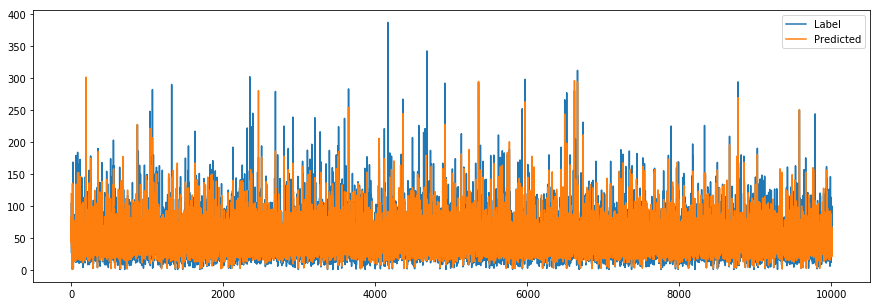

In [125]:
model = RandomForestRegressor(n_estimators=200, max_features='auto', 
                              max_depth=20, bootstrap=True, min_samples_split=2, 
                              criterion='mse', random_state=201203138)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Train score : {} \nTest score : {} \nTest L1 Error : {} \nTest MSE : {} \nTest R2 : {}".format(
    model.score(X_train_scaled, y_train), 
    model.score(X_test_scaled, y_test), 
    np.mean(np.abs(y_pred - y_test)),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)))

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])

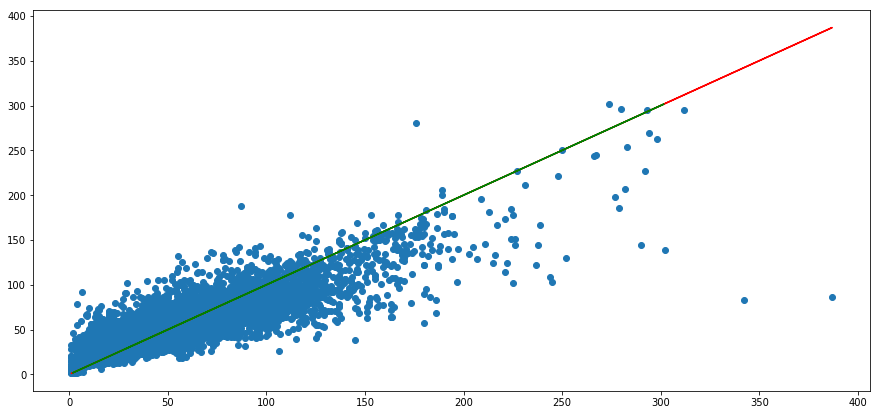

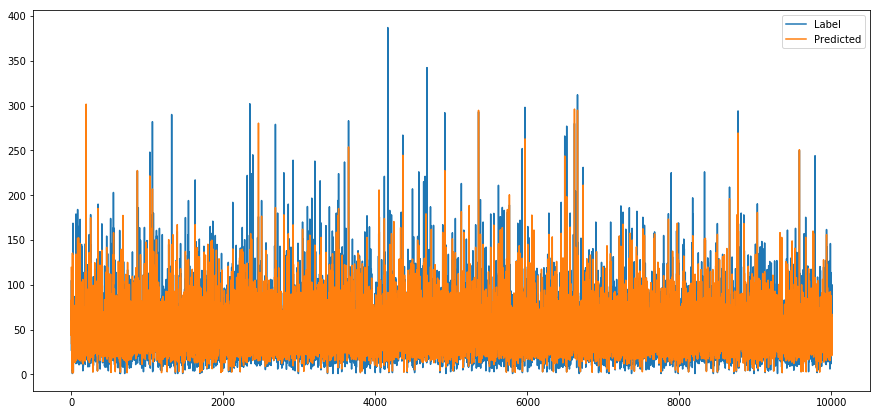

In [126]:
plt.figure(figsize=(15,7))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.plot(y_pred,y_pred,'g')

plt.figure(figsize=(15,7))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Label", "Predicted"])